# UCI ML Hand-Written Digit Prediction

In [1]:
import sys
import os

# Get the absolute path of the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the parent directory to sys.path
sys.path.insert(0, parent_dir)

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from src.multi_layer_perceptron_from_scratch import *

## Data Preprocessing

In [3]:
dataset = load_digits()

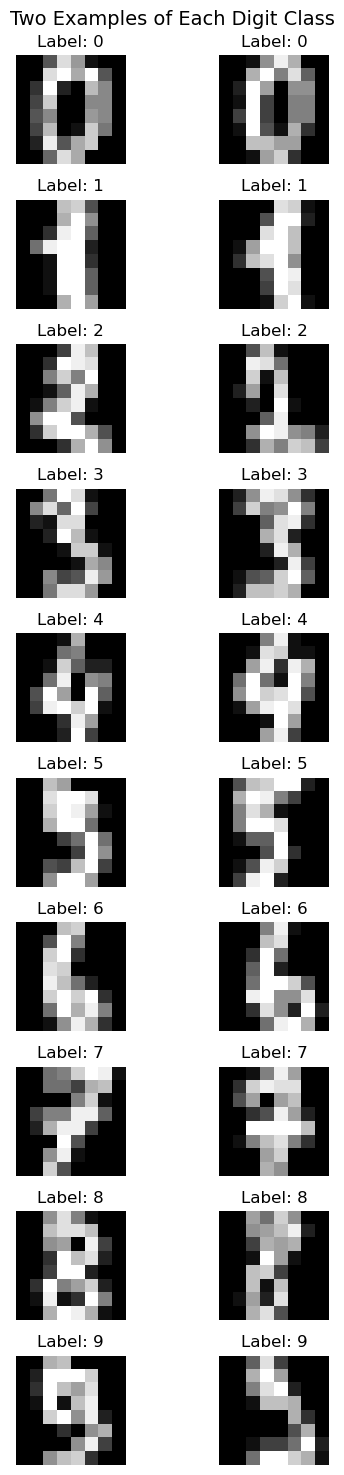

In [4]:
# Display 2 examples of each class
fig, axes = plt.subplots(10, 2, figsize=(5, 15))
for digit in range(10):
    examples = np.where(dataset.target == digit)[0][:2]  # Get first two indices of each class
    for i, idx in enumerate(examples):
        ax = axes[digit, i]
        ax.imshow(dataset.images[idx], cmap="gray")
        ax.set_title(f"Label: {digit}")
        ax.axis("off")
plt.suptitle("Two Examples of Each Digit Class", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

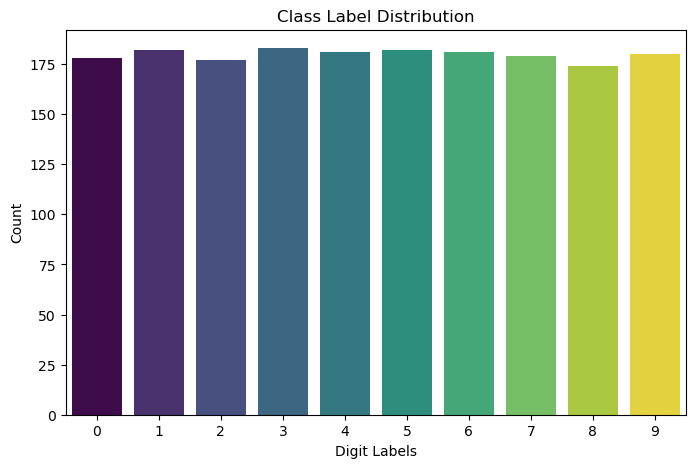

In [5]:
# Display class label distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=dataset.target, hue=dataset.target, palette="viridis", legend=False)
plt.xlabel("Digit Labels")
plt.ylabel("Count")
plt.title("Class Label Distribution")
plt.show()

In [6]:
# Extract data and targets
Y = dataset.target.astype(int)
X = dataset.data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [7]:
# Normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# One-hot Encoding
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

## Model Training & Evaluation

In [9]:
# Define model parameters
input_dim = X_train.shape[1]  
hidden_dim = 64  
output_dim = 10  # 10 classes (digits 0-9)
learning_rate = 0.1
epochs = 10000

In [10]:
# Initialize and train the MLP
print("Training MLP...")
mlp = MLP(input_dim, hidden_dim, output_dim, learning_rate, epochs)
mlp.train(X_train, y_train)

Training MLP...
Epoch 0/10000, Loss: 2.3027
Epoch 1000/10000, Loss: 1.6173
Epoch 2000/10000, Loss: 0.4821
Epoch 3000/10000, Loss: 0.2562
Epoch 4000/10000, Loss: 0.1732
Epoch 5000/10000, Loss: 0.1321
Epoch 6000/10000, Loss: 0.1071
Epoch 7000/10000, Loss: 0.0901
Epoch 8000/10000, Loss: 0.0775
Epoch 9000/10000, Loss: 0.0678


In [11]:
# Compute performance metrics
y_pred = mlp.predict(X_test)
y_test = encoder.inverse_transform(y_test)

results = {}
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
results['MLP (Scratch)'] = {"Accuracy": acc, "F1-Score": f1}

print(f"MLP (Scratch):")
print(f"Accuracy: {acc:.2f}")
print(f"F1-Score: {f1:.2f}")

MLP (Scratch):
Accuracy: 0.97
F1-Score: 0.97


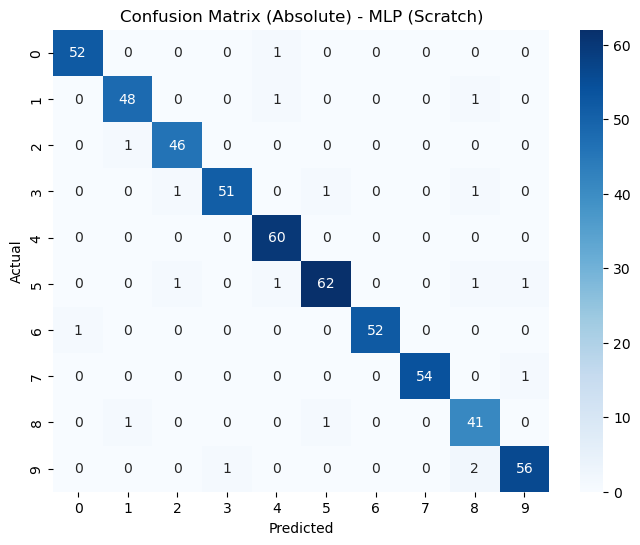

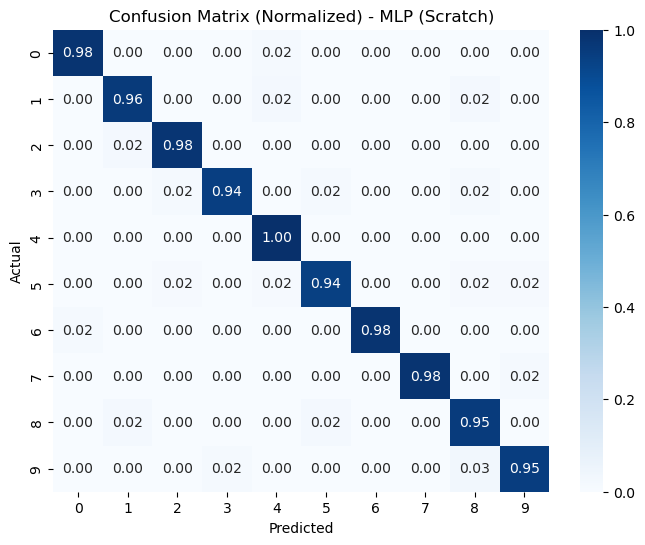

In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = np.unique(y_test) 

# Plot the confusion matrix (absolute values)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"Confusion Matrix (Absolute) - MLP (Scratch)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype("float") / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix (normalized values)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"Confusion Matrix (Normalized) - MLP (Scratch)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()